In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import glob 
from numpy.linalg import eig
import seaborn as sns
sns.set()
%matplotlib inline

In [21]:
#Get adjusting closing prices from each {sector}.csv file

df = pd.concat([pd.read_csv(f, usecols=[0,5], index_col = [0]) for f in glob.glob('*.csv')], ignore_index = True, axis = 1)

In [22]:
#Change column names to sector names
labels = [ f[0:3] for f in glob.glob('*.csv') ]
df.columns = labels

#Create dictionary mapping tickers to names


In [23]:
ret = df.pct_change().dropna()
ret.head()

,XLP,XLI,XLY,XLE,XLU,XLF,XLK,XLV,XLB
Date,,,,,,,,,
1998-12-23,0.024174,0.017452,0.004294,0.020820,-0.004191,0.014743,0.023893,0.022472,0.010504
1998-12-24,-0.001727,0.013193,0.018327,-0.005263,0.018412,0.006607,-0.003810,0.006107,0.023014
1998-12-28,-0.005767,0.005208,-0.008999,-0.005291,-0.005167,-0.013123,0.002867,-0.014563,-0.008709
1998-12-29,0.022042,0.014247,0.021792,0.009973,0.016615,0.010638,0.002861,0.022167,0.018302
1998-12-30,-0.006243,-0.004471,-0.008294,-0.015142,-0.008172,-0.003949,-0.003802,-0.008436,-0.002876


In [24]:
from sklearn.decomposition import PCA
X = np.array(ret.values)
pca = PCA(n_components=9)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=9, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

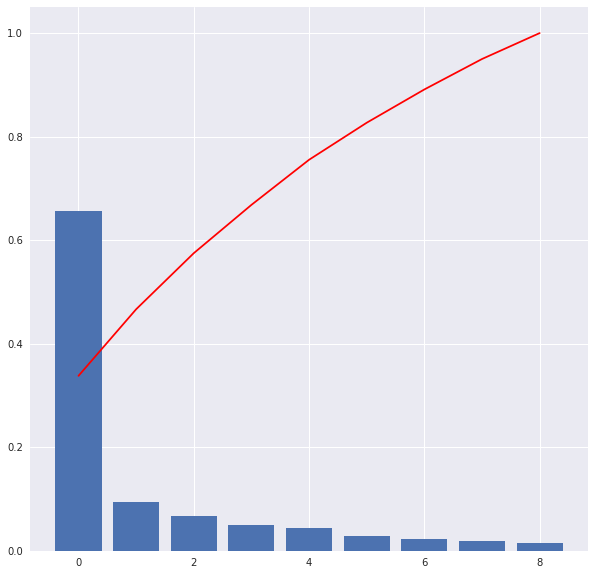

In [25]:
x = list(range(len(labels)))

plt.figure(figsize = (10,10))
plt.bar(x, pca.explained_variance_ratio_)  
y = [x / sum(pca.singular_values_) for x in pca.singular_values_]
plt.plot(np.cumsum(y), color = 'r')